<a href="https://colab.research.google.com/github/2203A52082/DAUP_PROJECT_2203A52082/blob/main/DAUP_PROJECT(Text).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from scipy import stats
import matplotlib.pyplot as plt

# STEP 1: Load and Preprocess Data
df = pd.read_csv("/content/news_sentiment_analysis.csv")
df.dropna(subset=["Title", "Sentiment"], inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["Sentiment"])  # 0 = negative, 1 = neutral, 2 = positive

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["Title"])
sequences = tokenizer.texts_to_sequences(df["Title"])
X = pad_sequences(sequences, maxlen=50)

y = df["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# STEP 2: CNN Model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)

print(f"\nCNN Accuracy: {cnn_accuracy:.4f}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6143 - loss: 0.9508 - val_accuracy: 0.6786 - val_loss: 0.7348
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7140 - loss: 0.6389 - val_accuracy: 0.7750 - val_loss: 0.5681
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8994 - loss: 0.2991 - val_accuracy: 0.8143 - val_loss: 0.6335
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9659 - loss: 0.1427 - val_accuracy: 0.8179 - val_loss: 0.6100
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9799 - loss: 0.0826 - val_accuracy: 0.8286 - val_loss: 0.6247
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8148 - loss: 0.7039

CNN Accuracy: 0.7957


In [ ]:
# STEP 3: LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(64),
    Dense(3, activation='softmax')
])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)

print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5914 - loss: 0.9692 - val_accuracy: 0.6714 - val_loss: 0.8017
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7225 - loss: 0.6940 - val_accuracy: 0.7750 - val_loss: 0.5783
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8770 - loss: 0.3677 - val_accuracy: 0.7821 - val_loss: 0.5649
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9344 - loss: 0.1961 - val_accuracy: 0.8036 - val_loss: 0.5330
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9672 - loss: 0.1247 - val_accuracy: 0.8321 - val_loss: 0.5647
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7877 - loss: 0.7092
LSTM Accuracy: 0.7800


In [ ]:
# STEP 4: Statistical Analysis
# Z-Test
z_stat, z_p = stats.ttest_ind(y_test, y_train, equal_var=False)
print(f"\nZ-Test: Z={z_stat:.4f}, p-value={z_p:.4f}")


Z-Test: Z=-1.1058, p-value=0.2691


In [ ]:
# T-Test
t_stat, t_p = stats.ttest_ind(y_test, y_train)
print(f"T-Test: T={t_stat:.4f}, p-value={t_p:.4f}")

T-Test: T=-1.1351, p-value=0.2564


In [ ]:
# Type I Error
alpha = 0.05
type1_error = t_p < alpha
print(f"Type I Error (False Positive): {type1_error}")

Type I Error (False Positive): False


In [ ]:
# Type II Error (Simulated)
effect_size = 0.1
n = len(y_test)
beta = 1 - stats.norm.cdf(stats.norm.ppf(1 - alpha) - effect_size * np.sqrt(n))
print(f"Type II Error (Simulated): {beta:.4f}")

Type II Error (Simulated): 0.8416


In [ ]:
# ANOVA
grouped = [df[df["label"] == i]["label"].values for i in np.unique(df["label"])]
anova_stat, anova_p = stats.f_oneway(*grouped)
print(f"ANOVA: F={anova_stat:.4f}, p-value={anova_p:.4f}")

ANOVA: F=inf, p-value=0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


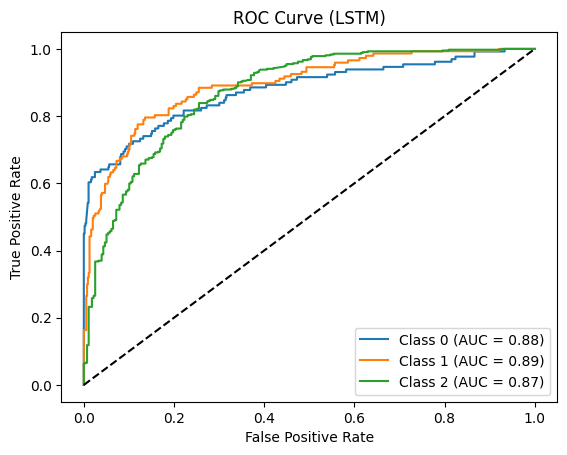

In [ ]:
# STEP 5: ROC Curve (for LSTM)
y_score_lstm = lstm_model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score_lstm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (LSTM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


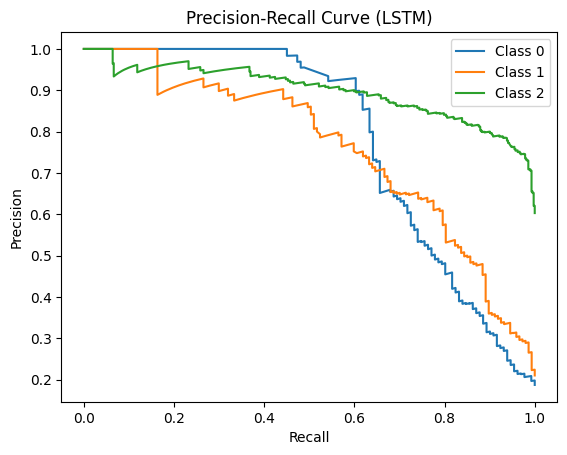

In [ ]:
# STEP 6: Precision-Recall Curve (LSTM)
precision = dict()
recall = dict()

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_score_lstm[:, i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.title("Precision-Recall Curve (LSTM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [ ]:
# STEP 7: Classification Reports
y_pred_lstm = np.argmax(y_score_lstm, axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

print("\nClassification Report (LSTM):")
print(classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))

print("\nClassification Report (CNN):")
print(classification_report(y_test, y_pred_cnn, target_names=label_encoder.classes_))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report (LSTM):
              precision    recall  f1-score   support

    negative       0.82      0.63      0.72       131
     neutral       0.67      0.67      0.67       147
    positive       0.81      0.86      0.83       422

    accuracy                           0.78       700
   macro avg       0.77      0.72      0.74       700
weighted avg       0.78      0.78      0.78       700


Classification Report (CNN):
              precision    recall  f1-score   support

    negative       0.81      0.66      0.73       131
     neutral       0.73      0.64      0.68       147
    positive       0.81      0.89      0.85       422

    accuracy                           0.80       700
   macro avg       0.78      0.73      0.75       700
weighted avg       0.79      0.80      0.79       700



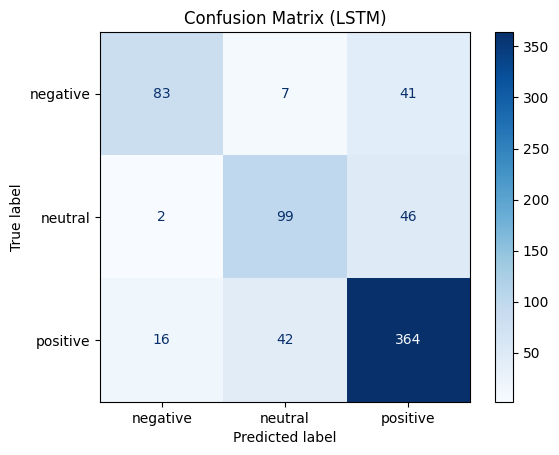

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=label_encoder.classes_)
disp_lstm.plot(cmap="Blues")
plt.title("Confusion Matrix (LSTM)")
plt.show()

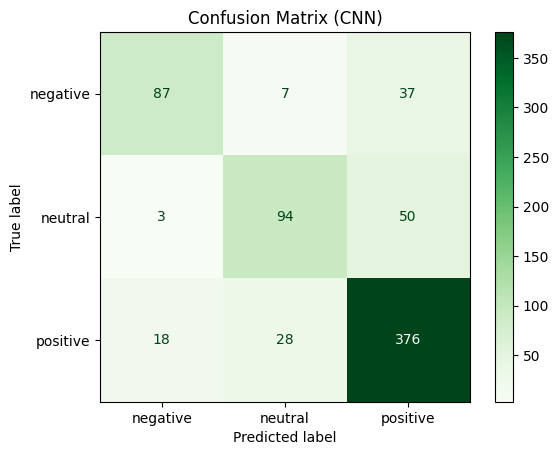

In [ ]:
# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=label_encoder.classes_)
disp_cnn.plot(cmap="Greens")
plt.title("Confusion Matrix (CNN)")
plt.show()
